<div style="background-color:#009440; padding: 0px; background-size:cover; background-opacity:50%; border-radius:5px; height: 300px">
    <div style="margin: 5px; padding: 10px;"><h1 style="color:#00000">Geophysical Data Acquisition and Analysis</h1>
    <h4 style="color:#dddddd">LMU, July 2023</h4>
        <h4 style="color:#dddddd">Author: Alice Gabriel, Tobias Megies, Sebastian Anger, Taufiqurrahman, J. Wassermann</h4>
    </div>
    <div style="float:right; margin: 10px; padding: 20px; background:rgba(255,255,255,0.7); width: 70%; height: 150px">
        <div style="position:relative; top:30%; transform: translateY(-50%)">
            <div style="font-size: x-large; font-weight:900; color:rgba(0,0,0,0.8); line-height:100%">P02 - Data and Observables - Solutions </div>
                    </div>
    </div>
</div>



This notebook is designed for 2-3 students to collaborate in finding information/data as requested. 
Use the descriptions of data centre resources in the lecture (especially the provided links to webinterfaces). You may also test your newly acquired obspy skills.

Your answers should include the follwoing aspects: “What kind of data, where do I find it, how do I get it”

## 1) Earthquake data and teleseismic waveforms

There was a great shallow Mw 7.8 event in Turkey in February 2023. You want to explore the differences in arrival times of a station close-by and a far station.

a. What do you need to find out first to be able to look for data?

b. Get the data of some phases of a close-by (e.g. < 10°) and a far station (e.g. ~60°). What are the station names you are choosing as good examples? What are the differences in arrival times for those stations? Can you try and explain them?

Hint: You may use one of the following datacenters (or its equivalents) : USGS significant EQ archive, IRIS metadata aggregator, IRIS Wilbur. 

Type your answers (what kind of data, where found, how did you get it plus the atual data you choose and the outcome of your analysis) below.

<i> a. </i>
    
Date, UTC time, coordinates, etc. -> e.g. USGS significant EQ archive: 2023-02-06 01:17:34 (UTC)37.226°N 37.014°E 10.0 km depth

<i> b. </i>

Several options: again USGS significant EQ archive (phases directly, if you know which station is near and far), EIDA metadata aggregator (check out available stations) or IRIS Wilbur (check out available stations & immediately get phase information)
e.g. TU.ANDN (near) and IU.GRFO (far) 

In [2]:
# We here provide code snippets for your solution


#supressing warnings about soon to be deprecated matplotlib functionality
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pylab as plt
import numpy as np

%matplotlib inline
#you can try using 'matplotlib notebook' instead to enable tools e.g. for zooming your plots

from scipy import interpolate, signal

from obspy.clients.fdsn import Client
# here I use the RoutingClient of EIDA - just as an example ....
from obspy.clients.fdsn import RoutingClient
from obspy.core import event
from IPython.display import Markdown, display

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 8, 3

1 Event(s) in Catalog:
2023-02-06T01:17:36.100000Z | +37.170,  +37.080 | 7.8  mw | manual


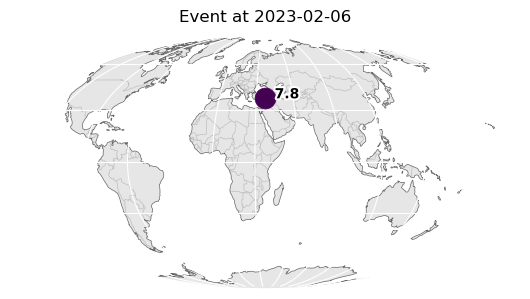

## ------------------------------------------------------------------------------------------------

Inventory created at 2023-07-24T07:15:48.272774Z
	Created by: ObsPy 1.4.0
		    https://www.obspy.org
	Sending institution: ObsPy FDSN Routing 1.4.0,SeisComP (ODC)
	Contains:
		Networks (1):
			TU
		Stations (1):
			TU.ANDN (ANDIRIN, TURKEY)
		Channels (3):
			TU.ANDN..HHZ, TU.ANDN..HHN, TU.ANDN..HHE


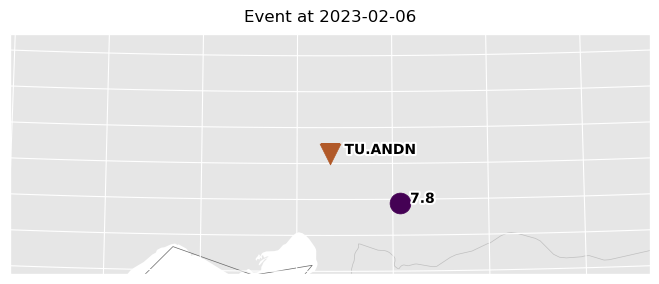

## ------------------------------------------------------------------------------------------------

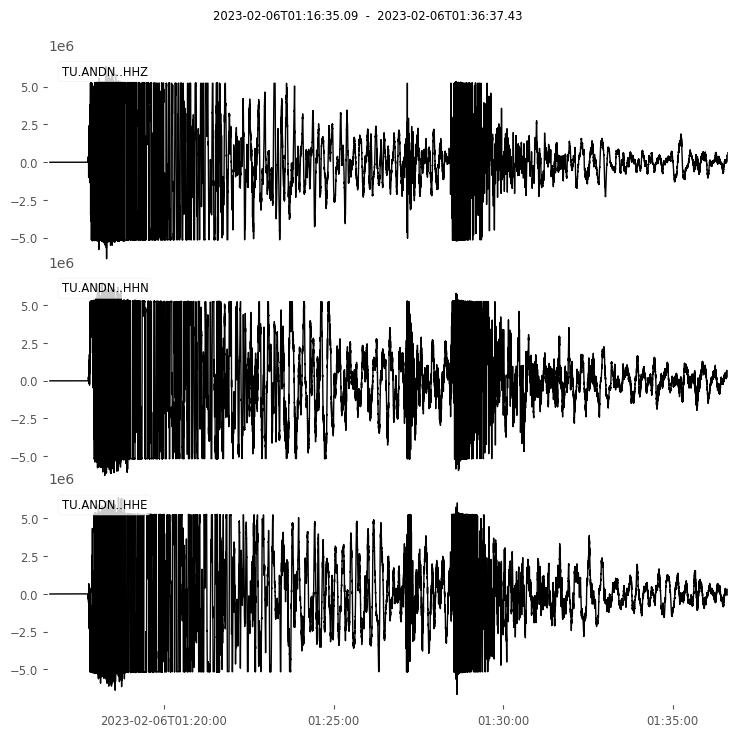

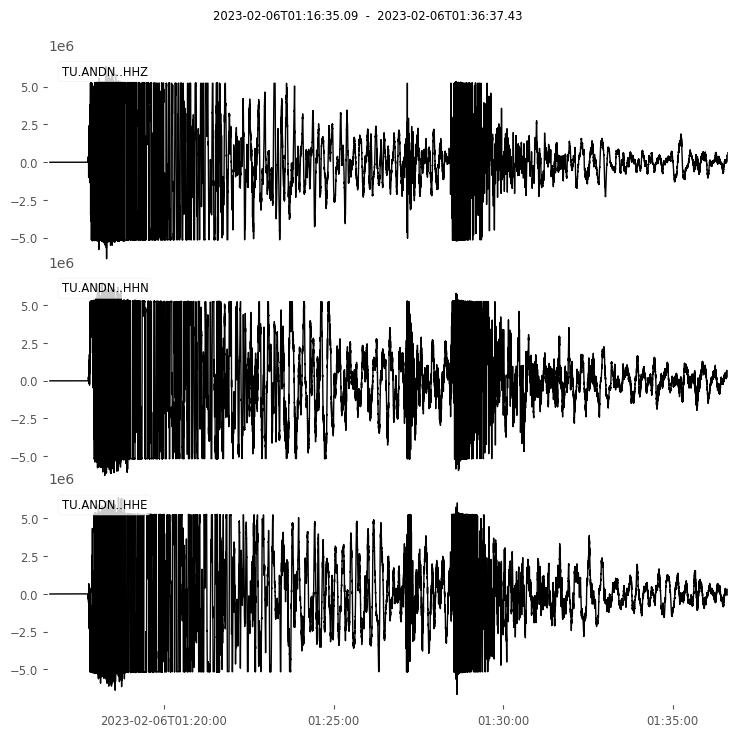

In [6]:
#Access the Nepal earthquake 
client_emsc = Client("EMSC")

catalog = client_emsc.get_events(minmagnitude=7.7, starttime="2023-02-01",endtime="2023-02-08")

print(catalog)
catalog.plot();

Separator="## ------------------------------------------------------------------------------------------------"

display(Markdown(Separator))

#Example: a very close-by station located in ANDIRIN, in the TU network 
t=catalog[0].origins[0].time - 60
client_eida = RoutingClient("eida-routing")
TurkeyStation = client_eida.get_stations(network="TU",starttime="2023-02-01",
                                      endtime="2023-02-08",station="ANDN",level="response")
print(TurkeyStation)
fig= TurkeyStation.plot(projection="local", colormap="viridis", show=False)
catalog.plot(method="cartopy", fig=fig);  

display(Markdown(Separator))
wave=client_eida.get_waveforms(network="TU",station="ANDN",channel="*",
                               location="*",starttime=t
                               ,endtime=t+20*60)
wave.plot()

## 2) CMT solutions (beach balls)

List the events with magnitude > 6.5 that happened since 1.1.2015, with a depth greater than 500 km. 
What do the moment tensors/beachballs of these events dominantly look like? Can you explain why? Where would you look for a different type of moment tensor?

Hint: You may use the GCMT catalog webinterface. Or try your newly acquire obspy skills. 

Type your answers (or the script you would use) below. Include what kind of data, where found, how did you get it plus the atual data you choose and the outcome of your analysis.

<i>
Several possibilities, but GCMT catalog dialog allows to select all these criteria and returns beachballs. Mostly thrust/normal compression type events, because of subduction settings.

In [3]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

#List the events using the IRIS catalog
client_iris = Client("Iris")
catalog = client_iris.get_events(minmagnitude=6.5, starttime="2015-01-01",mindepth=500)

Title="# List of Events w/ Mag. 6.5 or more since 2015.01.01"
display(Markdown(Title))

print(catalog)
# However, beware, the focal mechanisms are not shipped with this data! 
Title="# Attempt to plot the focal mechanism of the first event"
display(Markdown(Title))
event1Iris = catalog[0]
print(event1Iris.focal_mechanisms)

# List of Events w/ Mag. 6.5 or more since 2015.01.01

35 Event(s) in Catalog:
2023-04-28T03:13:48.485000Z | -25.191, +178.464 | 6.6  Mww
2023-04-18T04:31:43.586000Z | -22.316, +179.429 | 6.7  mww
...
2015-05-30T11:23:02.850000Z | +27.828, +140.494 | 7.9  MW
2015-02-27T13:45:05.640000Z |  -7.358, +122.491 | 7.0  MW
To see all events call 'print(CatalogObject.__str__(print_all=True))'


# Attempt to plot the focal mechanism of the first event

[]


# Focal mechanism of first event retrieved from USGS

Event:	2023-04-14T09:55:45.220000Z |  -6.041, +112.048 | 7.0  mww | manual

	                  resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/fdsnws/event/1/query?eventid=us6000k49j&format=quakeml")
	                   event_type: 'earthquake'
	                creation_info: CreationInfo(agency_id='us', creation_time=UTCDateTime(2023, 6, 27, 6, 16, 48, 251000))
	          preferred_origin_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us6000k49j/us/1687037812040/product.xml")
	       preferred_magnitude_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/origin/us6000k49j/us/1687037812040/product.xml#magnitude")
	 preferred_focal_mechanism_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/product/moment-tensor/us_6000k49j_mww/us/1687037812040/product.xml")
	                         ---------
	           event_descriptions: 1 Elements
	             focal_mechanisms: 3 Elements
	                      origins: 4 Elements
	           

# Event ID and special USGS event page 

https://earthquake.usgs.gov/earthquakes/eventpage/us6000k49j/


# Beachball

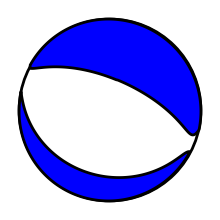

Figure(200x200)


In [4]:
from obspy.imaging import beachball
import re
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

# USGS is shipping moment tensor solutions! 
client = Client("USGS")
t = UTCDateTime(2010, 1, 1)

cat = client.get_events(minmagnitude=7, mindepth=500,producttype='moment-tensor',
includeallorigins=True, starttime=t)
event = cat[0]
focmec = event.focal_mechanisms[0]
mt = focmec.moment_tensor

tensor_components = [mt.tensor.m_rr, mt.tensor.m_tt, mt.tensor.m_pp,
                     mt.tensor.m_rt, mt.tensor.m_rp, mt.tensor.m_tp]

Title="# Focal mechanism of first event retrieved from USGS"
display(Markdown(Title))
print(event)

# print link to USGS event page, also has beachball plots etc.
match = re.search(r'eventid=([^&$]*)', str(event.resource_id))
if match:
    usgs_id = match.group(1)
    Title="# Event ID and special USGS event page "
    display(Markdown(Title))
    print(f'https://earthquake.usgs.gov/earthquakes/eventpage/{usgs_id}/')

Title="# Beachball"
display(Markdown(Title))
print(beachball.beachball(tensor_components))

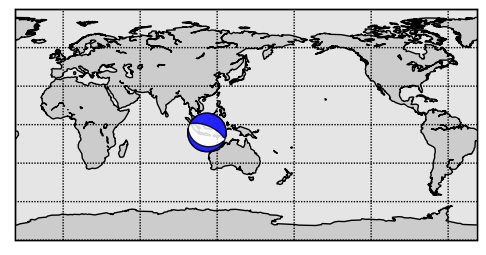

In [5]:
Title= "### Extra: How to do a brand new synthetic seismograph."

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from obspy.imaging.beachball import beach


m = Basemap(projection='cyl', lon_0=142.36929, lat_0=38.3215,
            resolution='c')

m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(-90., 120., 30.))
m.drawmeridians(np.arange(0., 420., 60.))
m.drawmapboundary()

origin = event.origins[0]
x, y = m(origin.longitude, origin.latitude)

ax = plt.gca()
b = beach(tensor_components, xy=(x, y), width=30, linewidth=1, alpha=0.85)
b.set_zorder(10)
ax.add_collection(b)
plt.show()

### Extra 1. How to do a brand new synthetic seismograph.

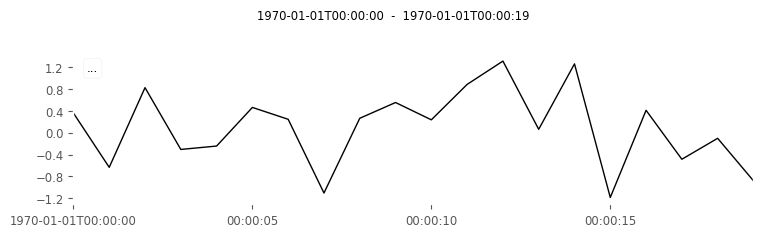

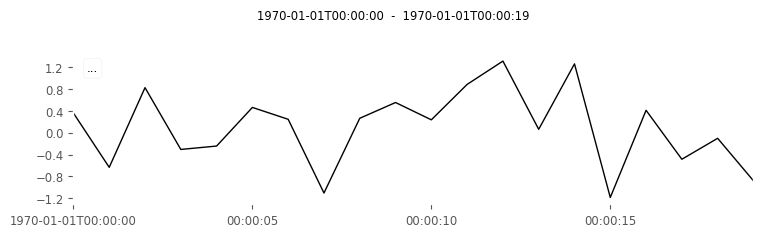

In [7]:
# A useful code snippet for later on
Title= "### Extra 1. How to do a brand new synthetic seismograph."
display(Markdown(Title))
from obspy import Trace
tr = Trace(data=np.random.randn(20))
tr.plot()

## 3) Seismotectonics

You think about planning a new seismotectonic project in Mongolia based on earthquake analysis and earthquake mechanisms. What seismic stations are available, and are the data publically available?
    
Hint: Use the IRIS metadata aggregator to find out if there is a national station network and if the data is available. Then use th GCMT catalogue to explore if the moment tensors are available.

Type your answers below. Include what kind of data, where found, how did you get it plus the atual data you choose and the outcome of your analysis. For this question, please also note if the data is openly available or partially/fully restricted.


<i>a. Does Mongolia has a national station network and are the data freely available? </i>

Use the IRIS metadata aggregator to confirm: yes! code XL, 74 stations, but no real-time, only archive until 2014 (partially restricted)

<i>b. Are there MTs available (42-52N and 87-121E)? </i>

GCMT catalogue: 72 mechanisms since 1979, 14 mechanisms since 2012 (archive start on XL network)

## 4) Magnetic data

You want to have a look on the magnetic field variations on 24.04.2016 at the station in Fürstenfeldbruck. Get the data. 

Hint: Use the intermagnet website.

<i>
Data download at www.intermagnet.org, page is pretty much self-explaining